In [7]:
import matplotlib.pyplot as plt
import fastdfe as fd

# instantiate parser
p = fd.Parser(
    n=10,
    vcf="../../resources/genome/betula/all.vcf.gz",
    stratifications=[fd.DegeneracyStratification(), fd.AncestralBaseStratification()]
)

# parse SFS
s: fd.Spectra = p.parse()

# extract neutral and selected SFS
neut = s['neutral.*'].merge_groups(1)
sel = s['selected.*'].merge_groups(1)

Counting sites: 2439037it [00:43, 55635.67it/s]
INFO:fastdfe.Parser: Using stratification: [neutral, selected].[A, C, G, T].
INFO:fastdfe.Parser: Starting to parse.
Processing sites: 100%|██████████| 2439037/2439037 [05:30<00:00, 7379.49it/s] 
INFO:fastdfe.PolyAllelicFiltration: Filtered out 0 sites.
INFO:fastdfe.DegeneracyStratification: Number of sites with valid type: 980934 / 2438327
INFO:fastdfe.AncestralBaseStratification: Number of sites with valid type: 980934 / 981644
INFO:fastdfe.Parser: Included 980934 out of 2439037 sites in total.


In [8]:
# create inference objects
inferences = [fd.BaseInference(sfs_neut=neut[t], sfs_sel=sel[t]) for t in neut.types]

# run inferences
[i.run() for i in inferences]

# bootstrap inferences
[i.bootstrap() for i in inferences]

INFO:fastdfe.Discretization: Precomputing linear DFE-SFS transformation using midpoint integration.
INFO:fastdfe.BaseInference: Successfully finished optimization after 10 iterations and 78 function evaluations, obtaining a log-likelihood of -31.429538741494866.
INFO:fastdfe.BaseInference: Inferred parameters: {'all.S_d': -100000.0, 'all.b': 0.09250725380768925, 'all.p_b': 0.0, 'all.S_b': 0.00010003368718414257, 'all.eps': 0.007131399121042546}.
INFO:fastdfe.Discretization: Precomputing linear DFE-SFS transformation using midpoint integration.
INFO:fastdfe.BaseInference: Successfully finished optimization after 48 iterations and 420 function evaluations, obtaining a log-likelihood of -31.781333903397154.
INFO:fastdfe.BaseInference: Inferred parameters: {'all.S_d': -4680.964377262656, 'all.b': 0.18103245458802353, 'all.p_b': 0.0, 'all.S_b': 0.0016690592847306126, 'all.eps': 0.008521268228204374}.
INFO:fastdfe.Discretization: Precomputing linear DFE-SFS transformation using midpoint inte

[              S_d         b       p_b     S_b       eps     alpha
 0   -99999.999995  0.107708  0.070929  0.0001  0.006586  0.217027
 1  -100000.000000  0.109729  0.078056  0.0001  0.006550  0.238850
 2  -100000.000000  0.106905  0.075633  0.0001  0.009989  0.226993
 3  -100000.000000  0.092369  0.000000  0.0001  0.007258  0.000000
 4  -100000.000000  0.092633  0.000000  0.0001  0.007840  0.000000
 ..            ...       ...       ...     ...       ...       ...
 95 -100000.000000  0.092453  0.000000  0.0001  0.006751  0.000000
 96  -99999.999995  0.096245  0.018803  0.0001  0.007973  0.058274
 97 -100000.000000  0.092126  0.000000  0.0001  0.006828  0.000000
 98 -100000.000000  0.092910  0.000000  0.0001  0.007155  0.000000
 99 -100000.000000  0.092115  0.000000  0.0001  0.007363  0.000000
 
 [100 rows x 6 columns],
             S_d         b       p_b       S_b       eps     alpha
 0  -4680.964377  0.181213  0.000000  0.001669  0.008718  0.000000
 1  -4680.964381  0.184826  0.00713

<Axes: title={'center': 'parameter estimates'}>

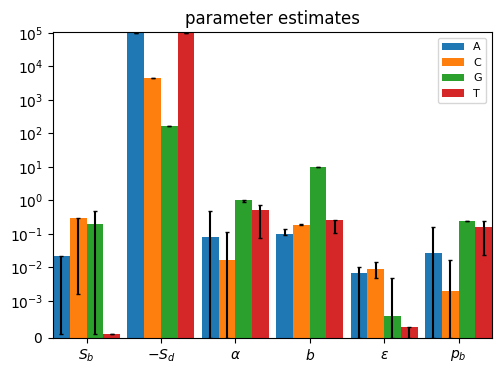

In [9]:
fd.Inference.plot_inferred_parameters(inferences, labels=neut.types)